In [38]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from collections import Counter
from subprocess import check_output

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

#plt.style.use('classic')
plt.style.use('ggplot')
%matplotlib inline

pd.options.display.max_rows = 999

In [5]:
print (check_output(["ls", '../input']).decode('utf8'))

9 _class_real_labels.docx
submissionFile
test_text
test_variants
training_text
training_variants



In [6]:
train_df = pd.read_csv("../input/training_variants")
test_df = pd.read_csv("../input/test_variants")

In [7]:
train_df.head(10)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4
5,5,CBL,V391I,4
6,6,CBL,V430M,5
7,7,CBL,Deletion,1
8,8,CBL,Y371H,4
9,9,CBL,C384R,4


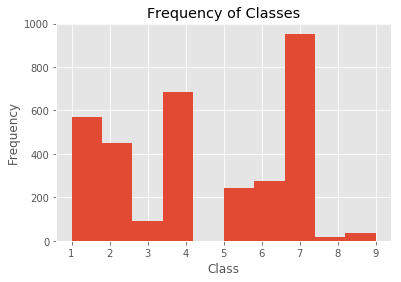

In [8]:
plt.hist(train_df.Class)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequency of Classes")
plt.show()

In [9]:
print ("Number of unique gene names: %s" % (len(train_df["Gene"].unique())))

Number of unique gene names: 264


In [10]:
train_df["Gene"].unique()

array(['FAM58A', 'CBL', 'SHOC2', 'TERT', 'DICER1', 'PTPRT', 'RHEB', 'SHQ1',
       'CCND2', 'RAD50', 'CCND3', 'RIT1', 'CCNE1', 'RYBP', 'TGFBR1',
       'TGFBR2', 'MSH6', 'KMT2D', 'LATS1', 'PBRM1', 'SF3B1', 'LATS2',
       'EGFR', 'NKX2-1', 'EIF1AX', 'ARID2', 'BRD4', 'HIST1H1C', 'ERRFI1',
       'CHEK2', 'PAK1', 'TMPRSS2', 'H3F3A', 'ELF3', 'ROS1', 'ASXL2',
       'CDH1', 'EPCAM', 'EP300', 'EPAS1', 'TP53', 'TP53BP1', 'SMAD2',
       'SMAD3', 'SMAD4', 'CDK4', 'AURKB', 'CDK6', 'FBXW7', 'CDK8',
       'CDKN1A', 'CDKN1B', 'CDKN2A', 'CDKN2B', 'CDKN2C', 'ASXL1', 'ERBB2',
       'ERBB3', 'ERBB4', 'ERCC2', 'BRIP1', 'ERCC3', 'ERCC4', 'ABL1',
       'CEBPA', 'ERG', 'HLA-A', 'HLA-B', 'PDGFRA', 'PDGFRB', 'RBM10',
       'KDM5C', 'ESR1', 'ETV1', 'ETV6', 'TSC1', 'IKZF1', 'TSC2', 'EWSR1',
       'ACVR1', 'FOXA1', 'MDM2', 'ARID1A', 'EZH2', 'MDM4', 'KLF4', 'RXRA',
       'MAP3K1', 'AXIN1', 'BAP1', 'MEN1', 'FANCA', 'FANCC', 'MET', 'U2AF1',
       'KMT2C', 'FAT1', 'ARID1B', 'PIK3CA', 'PIK3CB', 'PIM1', 'PIK

In [11]:
gene_dict = dict(Counter(train_df["Gene"]))
for key, value in sorted(gene_dict.items(), key=lambda x:x[1], reverse=True):
    print ("%s, %s") % (key, value)


BRCA1, 264
TP53, 163
EGFR, 141
PTEN, 126
BRCA2, 125
KIT, 99
BRAF, 93
ALK, 69
ERBB2, 69
PDGFRA, 60
PIK3CA, 56
CDKN2A, 52
FGFR2, 50
FLT3, 49
TSC2, 47
MTOR, 45
KRAS, 44
MAP2K1, 43
VHL, 41
RET, 40
FGFR3, 39
MLH1, 35
JAK2, 33
SMAD4, 33
MET, 33
NOTCH1, 31
AKT1, 28
ROS1, 26
PTPN11, 26
ABL1, 26
CBL, 25
CTNNB1, 25
RUNX1, 24
PIK3R1, 24
SMAD3, 23
PDGFRB, 23
PTPRT, 23
NFE2L2, 22
HRAS, 22
SMO, 21
MSH2, 21
ERBB4, 20
TSC1, 20
SPOP, 20
AR, 20
ERCC2, 19
SMAD2, 19
FBXW7, 19
JAK1, 18
RHOA, 17
NF1, 16
IDH1, 16
ESR1, 16
SF3B1, 16
NTRK1, 16
PMS2, 16
TET2, 14
KEAP1, 14
STK11, 13
FGFR1, 13
CCND1, 13
MSH6, 13
RAF1, 12
PPP2R1A, 12
NRAS, 12
CARD11, 12
ERBB3, 11
NF2, 11
MAP2K2, 11
EWSR1, 11
AKT2, 11
PIK3CB, 10
POLE, 10
CDK12, 10
RB1, 10
DDR2, 9
MAP2K4, 9
CDH1, 9
FANCA, 9
EP300, 9
DICER1, 9
BAP1, 9
FOXA1, 8
PIM1, 8
STAT3, 8
TERT, 8
MYC, 8
PIK3R2, 8
EPAS1, 8
ETV6, 8
TGFBR1, 8
EZH2, 8
CCND3, 7
CHEK2, 7
KDR, 7
SOX9, 7
RAC1, 7
CREBBP, 7
ARAF, 7
CDKN2B, 7
BRIP1, 7
B2M, 6
CASP8, 6
NKX2-1, 6
TMPRSS2, 6
MEF2B, 6
ATM, 6
SO

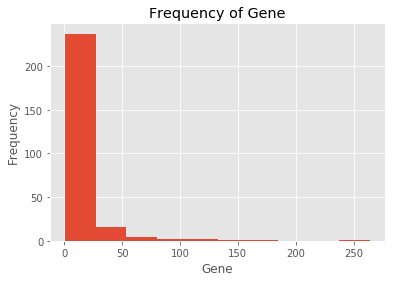

In [12]:
plt.hist(gene_dict.values())
plt.xlabel("Gene")
plt.ylabel("Frequency")
plt.title("Frequency of Gene")
plt.show()

In [13]:
train_df.groupby('Gene').sum()

,ID,Class
Gene,,
ABL1,22087,62
ACVR1,3207,16
AGO2,10435,6
AKT1,37898,165
AKT2,15103,76
AKT3,12722,23
ALK,106260,398
APC,8625,11
AR,35830,113


In [14]:
# Explore the BRCA1 gene
train_BRCA1 = train_df[train_df["Gene"] == "BRCA1"]
train_BRCA1.head()

,ID,Gene,Variation,Class
2417,2417,BRCA1,E1735K,6
2418,2418,BRCA1,R1753T,4
2419,2419,BRCA1,C44Y,4
2420,2420,BRCA1,R1835P,1
2421,2421,BRCA1,Truncating Mutations,1


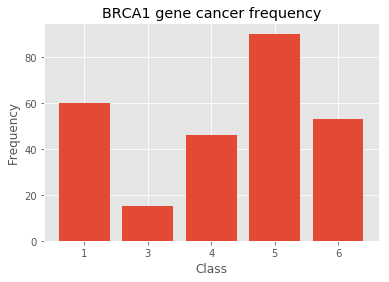

In [15]:
#plt.hist(train_BRCA1['Class'], bins=9)
D = dict(Counter(train_BRCA1['Class']))
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('BRCA1 gene cancer frequency')
plt.show()

# Note that no Classb 2 cancer


In [16]:
dict(Counter(train_df[train_df["Gene"] == "TSC2"]['Class']))

{1: 23, 4: 23, 7: 1}

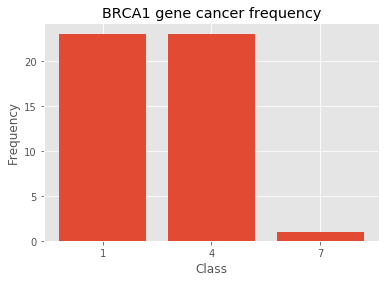

In [17]:
#plt.hist(train_BRCA1['Class'], bins=9)
#D = dict(Counter(train_BRCA1['Class']))
D = dict(Counter(train_df[train_df["Gene"] == "TSC2"]['Class']))
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('BRCA1 gene cancer frequency')
plt.show()

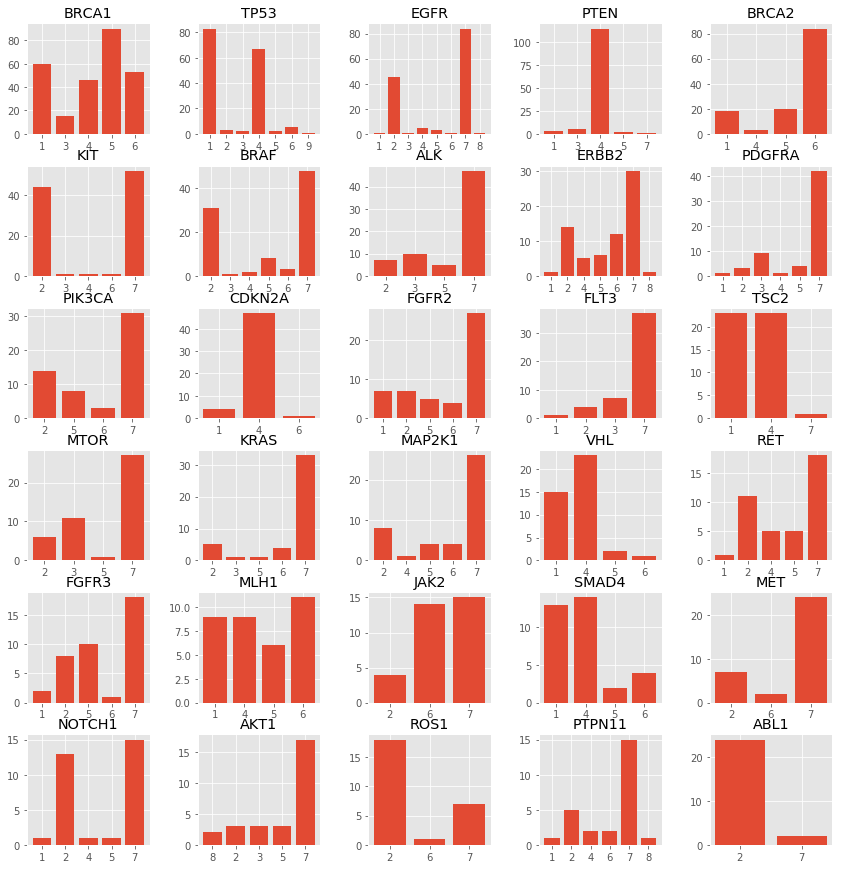

In [18]:
# Explore the top 20 genes
top30_genes = ["BRCA1", "TP53", "EGFR", "PTEN", "BRCA2", "KIT", "BRAF", "ALK", "ERBB2", "PDGFRA", \
              "PIK3CA", "CDKN2A", "FGFR2", "FLT3", "TSC2", "MTOR", "KRAS", "MAP2K1", "VHL", "RET", \
              "FGFR3", "MLH1", "JAK2", "SMAD4", "MET", "NOTCH1", "AKT1", "ROS1", "PTPN11", "ABL1"]
divider = 5

fig, ax = plt.subplots(6, 5, figsize=(12, 12))
#ax.set_xlabel('Class')
fig.tight_layout()
for index, gene in enumerate(top30_genes):
    D = dict(Counter(train_df[train_df["Gene"] == gene]['Class']))
    ax[index/divider, index%divider].bar(range(len(D)), D.values(), align='center')
    ax[index/divider, index%divider].set_title(gene)
    ax[index/divider, index%divider].set_xticks(range(len(D)))
    ax[index/divider, index%divider].set_xticklabels(list(D.keys()))


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [20]:
train_text_df = pd.read_csv("../input/training_text", sep='\|\|', engine="python", skiprows=1, \
                            header=None, names=["ID", "Text"])
test_text_df = pd.read_csv("../input/test_text", sep='\|\|', engine="python", skiprows=1, \
                            header=None, names=["ID", "Text"])

In [21]:
train_text_df.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [22]:
train_text_df['Text'][0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

In [23]:
train_df[(train_df['Gene']=='BRCA1') & (train_df['Variation']=='Truncating Mutations')]

,ID,Gene,Variation,Class
2421,2421,BRCA1,Truncating Mutations,1


In [24]:
train_df[(train_df['Gene']=='BRCA1') & (train_df['Variation']=='deletion')]

,ID,Gene,Variation,Class


In [25]:
train_df[train_df['Gene']=='BRCA1']

,ID,Gene,Variation,Class
2417,2417,BRCA1,E1735K,6
2418,2418,BRCA1,R1753T,4
2419,2419,BRCA1,C44Y,4
2420,2420,BRCA1,R1835P,1
2421,2421,BRCA1,Truncating Mutations,1
2422,2422,BRCA1,G1803A,1
2423,2423,BRCA1,A1830T,5
2424,2424,BRCA1,G1743R,1
2425,2425,BRCA1,I68K,6
2426,2426,BRCA1,C64G,4


In [26]:
train_df[(train_df['Gene']=='TP53') & (train_df['Class']==4)]

,ID,Gene,Variation,Class
369,369,TP53,S215G,4
370,370,TP53,R273L,4
372,372,TP53,H179Q,4
373,373,TP53,K120E,4
377,377,TP53,P278S,4
378,378,TP53,Y234H,4
380,380,TP53,S241T,4
381,381,TP53,V173E,4
384,384,TP53,P219S,4
385,385,TP53,R249W,4


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [28]:
train_text_df['Text'][2]

" Abstract Background  Non-small cell lung cancer (NSCLC) is a heterogeneous group of disorders with a number of genetic and proteomic alterations. c-CBL is an E3 ubiquitin ligase and adaptor molecule important in normal homeostasis and cancer. We determined the genetic variations of c-CBL, relationship to receptor tyrosine kinases (EGFR and MET), and functionality in NSCLC.  Methods and Findings  Using archival formalin-fixed paraffin embedded (FFPE) extracted genomic DNA, we show that c-CBL mutations occur in somatic fashion for lung cancers. c-CBL mutations were not mutually exclusive of MET or EGFR mutations; however they were independent of p53 and KRAS mutations. In normal/tumor pairwise analysis, there was significant loss of heterozygosity (LOH) for the c-CBL locus (22%, n\xe2\x80\x8a=\xe2\x80\x8a8/37) and none of these samples revealed any mutation in the remaining copy of c-CBL. The c-CBL LOH also positively correlated with EGFR and MET mutations observed in the same samples.

In [29]:
train_text_df['Text'][3]

'Recent evidence has demonstrated that acquired uniparental disomy (aUPD) is a novel mechanism by which pathogenetic mutations in cancer may be reduced to homozygosity. To help identify novel mutations in myeloproliferative neoplasms (MPNs), we performed a genome-wide single nucleotide polymorphism (SNP) screen to identify aUPD in 58 patients with atypical chronic myeloid leukemia (aCML; n = 30), JAK2 mutation\xe2\x80\x93negative myelofibrosis (MF; n = 18), or JAK2 mutation\xe2\x80\x93negative polycythemia vera (PV; n = 10). Stretches of homozygous, copy neutral SNP calls greater than 20Mb were seen in 10 (33%) aCML and 1 (6%) MF, but were absent in PV. In total, 7 different chromosomes were involved with 7q and 11q each affected in 10% of aCML cases. CBL mutations were identified in all 3 cases with 11q aUPD and analysis of 574 additional MPNs revealed a total of 27 CBL variants in 26 patients with aCML, myelofibrosis or chronic myelomonocytic leukemia. Most variants were missense sub

In [30]:
train_text_df['Text'][4]

'Oncogenic mutations in the monomeric Casitas B-lineage lymphoma (Cbl) gene have been found in many tumors, but their significance remains largely unknown. Several human c-Cbl (CBL) structures have recently been solved depicting the protein at different stages of its activation cycle and thus provide mechanistic insight underlying how stability-activity tradeoffs in cancer-related proteins may influence disease onset and progression. In this study, we computationally modeled the effects of missense cancer mutations on structures representing four stages of the CBL activation cycle to identify driver mutations that affect CBL stability, binding, and activity. We found that recurrent, homozygous, and leukemia-specific mutations had greater destabilizing effects on CBL states than did random non-cancer mutations. We further tested the ability of these computational models assessing the changes in CBL stability and its binding to ubiquitin conjugating enzyme E2, by performing blind CBL-med

## Merge the train variants with train text ##

In [33]:
train = pd.merge(train_df, train_text_df, on = ['ID'])
train.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


## Merge the test variants with test text ##

In [34]:
test = pd.merge(test_df, test_text_df, on = ['ID'])
test.head()

,ID,Gene,Variation,Text
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


## Concatenate train and test ##

In [35]:
total = pd.concat([train, test], ignore_index=True)

In [36]:
total.head()

,Class,Gene,ID,Text,Variation
0,1.0,FAM58A,0,Cyclin-dependent kinases (CDKs) regulate a var...,Truncating Mutations
1,2.0,CBL,1,Abstract Background Non-small cell lung canc...,W802*
2,2.0,CBL,2,Abstract Background Non-small cell lung canc...,Q249E
3,3.0,CBL,3,Recent evidence has demonstrated that acquired...,N454D
4,4.0,CBL,4,Oncogenic mutations in the monomeric Casitas B...,L399V


In [37]:
total.tail()

,Class,Gene,ID,Text,Variation
8984,NaN,SLC46A1,5663,The realization in the late 1970s that RAS har...,R113S
8985,NaN,FOXC1,5664,Hemizygous deletions are common molecular abno...,L130F
8986,NaN,GSS,5665,All most R267W of has with to SMARTpool invest...,R267W
8987,NaN,CTSK,5666,Abstract Blood samples from 125 unrelated fami...,G79E
8988,NaN,DFNB59,5667,"Loss of DNA mismatch repair (MMR) in humans, m...",T54I


## Extract the sentenses that include the Variation name from the Text column ##

In [40]:
relevant_sentenses = []
for var, text in zip(total['Variation'], total['Text']):
    sentences = [s for s in sent_tokenize(text.decode('utf8')) if var in s]
    relevant_sentenses.append(sentences)


In [41]:
len(relevant_sentenses)

8989

In [46]:
relevant_sentenses[1]

[u'Using select c-CBL somatic mutations such as S80N/H94Y, Q249E and W802* (obtained from Caucasian, Taiwanese and African-American samples, respectively) transfected in NSCLC cell lines, there was increased cell viability and cell motility.',
 u'In this study, we report novel c-CBL somatic mutations S80N/H94Y, Q249E and W802* in Caucasian, Taiwanese and African-American lung cancer patients, respectively.',
 u"Using this parental plasmid pAlterMax-c-CBL, the TKB domain double mutation (S80N/H94Y), the point mutation (Q249E), and the C-terminal point mutation W802* of c-CBL were created using the following primers: 5\u2032-GCTGGCGCTAAAGAATAACCCACCTTATATCTTAGAC-3\u2032 and 5\u2032-CTACCAGATACCTACCAGTATCTCCGTACTATCTTGTC-3\u2032 for the double mutation S80N/H94Y; 5\u2032-CTTTACCCGACTCTTTGAGCCCTGGTCCTCTTTGC-3\u2032 for Q249E, and 5\u2032-CAGCTCCTCCTTTGGCTGATTGTCTCTGGATGGTGATC-3\u2032 for W802* along with their complementary primers using the QuickChange Site-Directed Mutagenesis XL kit (St

In [48]:
relevant_sentenses[3]

[u'Most of the changes were novel, although 4 cases had R420Q as previously identified in a single case of AML.15 Apart from N454D, all residues affected by missense mutations were completely conserved in CBL orthologues as well as the 2 other human CBL family members (Figure 3).',
 u'The N454D change was not transforming, indicating that it is probably a rare polymorphism or a pathogenetically unimportant passenger mutation (Figure 7).',
 u'The S376F, H398Y, P417A and R420Q mutants showed loss of ubiquitin ligase activity, whereas N454D was comparable to wild-type CBL (Figure 8B).',
 u'The fact that one mutation (N454D) was not transforming emphasizes the importance of functional analysis to distinguish driver mutations from irrelevant passengers or infrequent polymorphisms.31 Notably, this mutation was only weakly conserved between species, in contrast to all other missense mutations that affected highly conserved residues and are therefore likely to be functionally significant.',
 u

In [50]:
relevant_sentenses[4]

[u'Finally, the third group constituted mutations (L399V, G375P, P395A and V391I) which attenuated the CBL E3 activity according to the relative densitometry data (Fig.',
 u'G375P and P395A mutations were predicted to have partially damaging effects while V391I and L399V were classified as benign in our predictions.']